In [27]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

In [28]:
### Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [29]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [30]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [31]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4.1-nano")
# llm.invoke("hell")

In [32]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="llama-3.3-70b-versatile")
llm_groq.invoke("hi I am sachchida. I am AI enthusiast")

AIMessage(content="Hello Sachchida, nice to meet you. It's great to hear that you're an AI enthusiast. Artificial Intelligence is a fascinating field with endless possibilities and applications. What aspects of AI interest you the most? Are you into machine learning, natural language processing, computer vision, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 46, 'total_tokens': 107, 'completion_time': 0.14941559, 'prompt_time': 0.00226369, 'queue_time': 0.04902887, 'total_time': 0.15167928}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d12ca183-9167-4dc1-863b-28564a7e8b88-0', usage_metadata={'input_tokens': 46, 'output_tokens': 61, 'total_tokens': 107})

In [33]:
def superbot(state:State):
    return {"messages": llm_groq.invoke(state["messages"])}

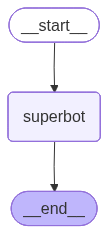

In [34]:
from IPython.display import Image,display
graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)
graph_builder=graph.compile()
## display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [35]:
graph_builder.invoke({'messages':'Hi My Nameis Sachchida I like cricket and I am an AI enthusiast'})

{'messages': [HumanMessage(content='Hi My Nameis Sachchida I like cricket and I am an AI enthusiast', additional_kwargs={}, response_metadata={}, id='08f31dd3-dca0-4a93-a9a3-7d690229e681'),
  AIMessage(content="Hello Sachchida, nice to meet you. It's great to hear that you're a cricket fan and an AI enthusiast. Cricket is an exciting sport with a huge following, and AI is a rapidly evolving field with many interesting applications.\n\nWhat aspect of cricket do you enjoy the most? Are you a fan of a particular team or player? And what sparked your interest in AI? Are you exploring its applications in cricket or other areas? I'm here to chat and learn more about your interests.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 51, 'total_tokens': 152, 'completion_time': 0.234564055, 'prompt_time': 0.002619591, 'queue_time': 0.048873965, 'total_time': 0.237183646}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f

### Because we are usign reducers Human message and AIMessage both are appeneded in messages

### Streaming the responses

In [36]:
graph_builder.stream({"messages":"Hello"})

<generator object Pregel.stream at 0x25c35130>

In [37]:
for event in graph_builder.stream({"messages":"Hi This side Sachchida"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hi This side Sachchida', additional_kwargs={}, response_metadata={}, id='760b09c7-d053-4463-83d5-73aef66eb9e0')]}
{'messages': [HumanMessage(content='Hi This side Sachchida', additional_kwargs={}, response_metadata={}, id='760b09c7-d053-4463-83d5-73aef66eb9e0'), AIMessage(content='Hello Sachchida, how can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 41, 'total_tokens': 54, 'completion_time': 0.036828526, 'prompt_time': 0.00207196, 'queue_time': 0.061816625, 'total_time': 0.038900486}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c93c588b-4461-4f1f-9d14-d3eb3b369e40-0', usage_metadata={'input_tokens': 41, 'output_tokens': 13, 'total_tokens': 54})]}


In [38]:
### Stream mode update
for event in graph_builder.stream({"messages":"Hi This side Sachchida"},stream_mode="updates"):
    print(event)

{'superbot': {'messages': AIMessage(content='Hello Sachchida, how can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 41, 'total_tokens': 54, 'completion_time': 0.036808203, 'prompt_time': 0.002076113, 'queue_time': 0.048926347, 'total_time': 0.038884316}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--abf3b4dd-bbcc-49a1-be7e-3f590495a62c-0', usage_metadata={'input_tokens': 41, 'output_tokens': 13, 'total_tokens': 54})}}


##### Tool calling

In [ ]:
def add(a:int, b:int)-> int:
    """ Add a and b
    Args:
        a (int) first int
        b (int) second int

        Returns:
            int
    """
    print("a->",a)
    print("b->",b)
    return a+b

### binding tool with llm

In [40]:
from langchain_core.messages import HumanMessage,AIMessage

In [42]:
llm_with_tool=llm.bind_tools([add])
tool_call=llm_with_tool.invoke([HumanMessage(content=f"What is 2 plus 2",name="Sachi")])

In [43]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'call_pHcU18EgdMusFUAUYC3264hu',
  'type': 'tool_call'}]

### Messages as State

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    # name:str



### Reducers with add_messages

In [48]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="Sachi"))
initial_messages

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Sachi')]

In [55]:
ai_message=AIMessage(content=f"which programming language you want to learn",name="LLMModel")
ai_message

AIMessage(content='which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel')

In [56]:
### usign reducer add_message
### Reducers is used to append instaed of override
add_messages(initial_messages,ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLModel', id='dffbecf2-18ca-43eb-bca4-425a0e09e218'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Sachi', id='1be5bf18-521f-44e1-8ff7-8c5ae82b7e4e'),
 AIMessage(content='which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='d5424c20-38b1-49cc-85a4-2e7798471f71'),
 AIMessage(content='which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='f4be30f3-c684-453f-9ddb-689472023aa1')]

### chatbot node functionality

In [57]:
def llm_tool(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [58]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)
builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)

graph=builder.compile()

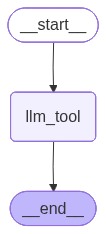

In [59]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [61]:
from pprint import pprint, PrettyPrinter

In [63]:
### Invocation
messages=graph.invoke({"messages":"what is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

what is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (call_LWSxh0rT2np1Z5zYO0DBSYMY)
 Call ID: call_LWSxh0rT2np1Z5zYO0DBSYMY
  Args:
    a: 2
    b: 2
